# Klasifikace ručně psaných číslic v Kerasu


## Data set MNIST

Pro úlohu použijeme známý data set [MNIST](http://yann.lecun.com/exdb/mnist/), který obsahuje obrázky ručně psaných číslic od 0 do 9 včetně označení správné třídy. Cílem bude navrhnout a natrénovat neuronovou síť, která dokáže určit, jaká číslice se na obrázku nachází.

![Mnist data set](https://github.com/jirimaterna/image-processing-2days/blob/master/images/mnist-examples.png?raw=1)

## Načtení dat

Data set je součástí knihovny Keras, takže je jeho načtení snadné. Data jsou již rozdělena na trénovací a testovací část.

In [1]:
%tensorflow_version 2.x
import pickle
from tensorflow.python.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Rozmery vstupnich trenovacich dat X_train: {}".format(X_train.shape))
print("Rozmery vystupnich trenovacich dat y_train: {}".format(y_train.shape))
print("Rozmery vstupnich testovacich dat X_test: {}".format(X_test.shape))
print("Rozmery vystupnich trenovacich dat y_test: {}".format(y_test.shape))

Rozmery vstupnich trenovacich dat X_train: (60000, 28, 28)
Rozmery vystupnich trenovacich dat y_train: (60000,)
Rozmery vstupnich testovacich dat X_test: (10000, 28, 28)
Rozmery vystupnich trenovacich dat y_test: (10000,)


Můžeme se podívat na jeden příklad z trénovací množiny.

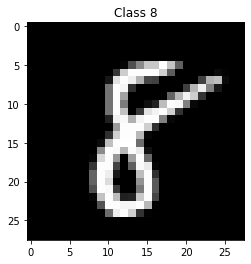

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transformace dat

Vstupní data je nutné nejdříve normalizovat. Vzhledem k tomu, že jsou hodnoty všech pixelů ze stejného rozsahu, bude stačit všechny hodnoty podělit 255. Tím je dostaneme do intervalu <0, 1>.


In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Abyhom mohli obrázky zpracovávat jednoduchou neuronovou sítí, je potřeba je převést na pole atributů. Z obrázků velikosti 28x28 pixelů se tedy stane pole o délce 784 reálých čísel.

In [4]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
print("Rozmery X_train: {}".format(X_train_flat.shape))
print("Rozmery X_test: {}".format(X_test_flat.shape))

Rozmery X_train: (60000, 784)
Rozmery X_test: (10000, 784)


Výstupní hodnoty jsou v originálních datech celá čísla od 0 do 9. Abychom je mohli v neuronové síti použít, je třeba je převést na one-hot encoding:

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
.
.
.
9 -> [0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [5]:
from tensorflow.python.keras.utils import np_utils

n_classes = 10

print(y_train[49])

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Definice architektury neuronové sítě


Pro změnu použijeme jako aktivační funkci vnitřních vrstev _relu_. Dobře by ale posloužila i funkce _tanh_. Vzhledem k tomu, že máme 10 klasifikačních tříd, na výstupu budeme potřebovat 10 neuronů a aktivační funkci _softmax_. Zkuste experimentovat s jinými architekturami neuronové sítě.

In [6]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(64, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Vzhledem k tomu, že se jedná o klasifikaci do více tříd, při kompilaci musíme zadat jako chybovou funkci _categorical_crossentropy_.

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Natrénování modelu

In [8]:
model.fit(X_train_flat, y_train,
          batch_size = 128, epochs = 10, verbose=1,
          validation_data=(X_test_flat, y_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4091 - accuracy: 0.8887 - val_loss: 0.2325 - val_accuracy: 0.9327
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2079 - accuracy: 0.9411 - val_loss: 0.1714 - val_accuracy: 0.9504
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1579 - accuracy: 0.9548 - val_loss: 0.1365 - val_accuracy: 0.9593
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.9636 - val_loss: 0.1171 - val_accuracy: 0.9655
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.9693 - val_loss: 0.1118 - val_accuracy: 0.9653
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.9730 - val_loss: 0.1037 - val_accuracy: 0.9684
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9772 - val_loss: 0.0928 - val_accuracy: 0.9719
Epoch 

## Vyhodnocení modelu

Z neuronové sítě dostáváme na výstupu pravděpodobnosti jednolitvých tříd. Je tedy tředba najít třídu s nejvyšší pravděpodobností.

In [9]:
y_pred = model.predict(X_test_flat)

print(y_pred.shape)

(10000, 10)


In [10]:
import numpy as np

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class.shape)

(10000,)


Nyní můžeme použít implementace vyhodnocovacích funkcí z knihovny ScikitLearn.


In [11]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print ("Accuracy testovaci mnoziny: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Accuracy testovaci mnoziny: 0.9728

              precision    recall  f1-score   support

           0     0.9728    0.9867    0.9797       980
           1     0.9860    0.9921    0.9890      1135
           2     0.9739    0.9748    0.9743      1032
           3     0.9701    0.9634    0.9667      1010
           4     0.9674    0.9684    0.9679       982
           5     0.9543    0.9832    0.9685       892
           6     0.9751    0.9802    0.9776       958
           7     0.9821    0.9601    0.9710      1028
           8     0.9719    0.9589    0.9654       974
           9     0.9709    0.9594    0.9651      1009

    accuracy                         0.9728     10000
   macro avg     0.9725    0.9727    0.9725     10000
weighted avg     0.9729    0.9728    0.9728     10000



Pro zjisteni, ktere tridy u klasifikace do vice trid jsou zamenovany nejcasteji je vhodne vypsat matici zamen.

In [12]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[ 967    0    1    1    0    2    6    1    1    1]
 [   0 1126    4    0    0    1    1    0    3    0]
 [   6    0 1006    2    1    0    3    5    8    1]
 [   0    0    4  973    0   24    0    3    5    1]
 [   3    0    2    1  951    1    7    1    2   14]
 [   3    0    0    3    1  877    4    1    2    1]
 [   5    3    0    1    4    5  939    0    1    0]
 [   2    8   11    4    4    0    0  987    4    8]
 [   5    1    4    7    9    5    3    3  934    3]
 [   3    4    1   11   13    4    0    4    1  968]]


## Na závěr může zobrazit některé z chybně klasifikovaných příkladů.

In [13]:
incorrect_indices = np.nonzero(y_pred_class != y_test_class)[0]
print(incorrect_indices)

[ 115  149  217  247  259  321  340  381  445  495  507  551  582  610
  619  659  684  691  707  740  760  844  846  890  938  947  951  956
  965 1014 1039 1107 1112 1114 1166 1178 1181 1194 1198 1226 1232 1242
 1247 1260 1283 1290 1299 1319 1326 1328 1337 1393 1414 1444 1496 1500
 1522 1530 1531 1549 1553 1581 1609 1621 1681 1709 1717 1748 1754 1790
 1901 1938 1941 1952 1984 2004 2016 2024 2029 2053 2070 2073 2098 2109
 2118 2129 2130 2135 2174 2182 2195 2224 2272 2293 2387 2406 2414 2422
 2425 2447 2488 2534 2582 2607 2618 2648 2654 2730 2877 2896 2915 2921
 2939 2952 2953 3005 3030 3060 3073 3117 3251 3405 3422 3490 3503 3520
 3558 3559 3567 3575 3597 3604 3674 3718 3727 3751 3757 3776 3780 3808
 3811 3818 3838 3853 3902 3906 3926 3941 3943 3985 3995 4000 4007 4065
 4075 4078 4093 4154 4176 4199 4207 4211 4224 4248 4269 4289 4369 4415
 4419 4425 4437 4497 4567 4601 4635 4639 4740 4807 4814 4823 4833 4838
 4861 4879 4880 4886 4888 4956 4966 5140 5331 5409 5457 5600 5611 5642
 5676 

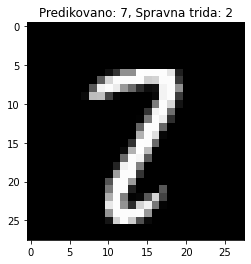

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
i = incorrect_indices[5]

plt.imshow(X_test[i], cmap='gray')
plt.title("Predikovano: {}, Spravna trida: {}".format(y_pred_class[i], y_test_class[i]))
plt.show()